### Plot power/load results

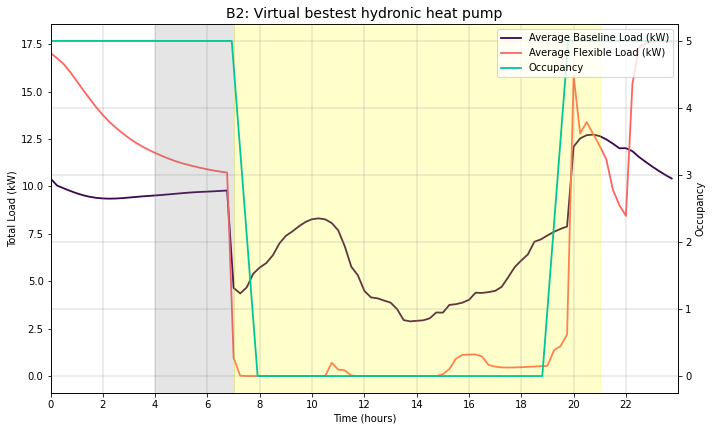

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_bas_heat = pd.read_csv('baseline_HpowerData.csv', index_col='time', parse_dates=True)
df_flex_heat = pd.read_csv('flexible_HpowerData.csv', index_col='time', parse_dates=True)
df_bas_elec = pd.read_csv('baseline_powerData.csv', index_col='time', parse_dates=True)
df_flex_elec = pd.read_csv('flexible_powerData.csv', index_col='time', parse_dates=True)

df_schedule = pd.read_csv('scheduleData.csv', index_col='time', parse_dates=True)

df_bas = pd.merge(df_bas_heat, df_bas_elec, on='time', how='inner')  
df_flex = pd.merge(df_flex_heat, df_flex_elec, on='time', how='inner')  

df_bas['Total'] = df_bas.sum(axis=1)
df_flex['Total'] = df_flex.sum(axis=1)

df_bas.index = pd.to_datetime(df_bas.index, unit='s')
df_flex.index = pd.to_datetime(df_flex.index, unit='s')
df_schedule.index = pd.to_datetime(df_schedule.index, unit='s')

# Calculate 15-minute averages for each day
df_bas_minute_average = df_bas['Total'].resample('15T').mean()
df_flex_minute_average = df_flex['Total'].resample('15T').mean()

# Calculate hour averages for each day
schedule_hour_average = df_schedule['Occupancy[1]'].resample('H').mean()

# Group the minute averages by the 15-minute of the day and calculate the mean
bas_minute_mean_across_days = df_bas_minute_average.groupby(pd.Grouper(freq='15T')).mean()
flex_minute_mean_across_days = df_flex_minute_average.groupby(pd.Grouper(freq='15T')).mean()

# Calculate the mean values for each 15-minute across the 14 days
bas_average_day = bas_minute_mean_across_days.groupby(bas_minute_mean_across_days.index.time).mean()
flex_average_day = flex_minute_mean_across_days.groupby(flex_minute_mean_across_days.index.time).mean()

# Plot the data for one average day
fig = plt.figure(figsize=(10, 6))

# Plot electric power 
baseline_load_line, = plt.plot(np.linspace(0, 23.75, len(bas_average_day)), bas_average_day/ 1000,
                      linestyle='-', linewidth=1.8, label='Average Baseline Load (kW)', color = '#3c054f')
flex_load_line, = plt.plot(np.linspace(0, 23.75, len(flex_average_day)), flex_average_day/ 1000,
                      linestyle='-', linewidth=1.8, label='Average Flexible Load (kW)', color = '#ff6361')
plt.ylabel('Total Load (kW)')
plt.xlabel('Time (hours)')

# Plot occupancy on secondary y-axis
ax_occ = plt.twinx()
occupancy_line, = ax_occ.plot(np.linspace(0, 23.75, len(schedule_hour_average)), schedule_hour_average, '#00c698',
                              linestyle='-', linewidth=1.8, label='Occupancy')
ax_occ.set_ylabel('Occupancy')

# Combine the legends
plt.legend(handles=[baseline_load_line, flex_load_line, occupancy_line], loc='upper right')
custom_ticks = np.arange(0, 24, 2)  # Generate ticks from 0 to 24 with step 2
plt.xticks(custom_ticks)

# Adding a shaded area for shift 
plt.axvspan(4, 7, alpha=0.2, color='gray')
# Adding a shaded area for shed
plt.axvspan(7, 21, alpha=0.2, color='yellow')

# Adding vertical gridlines
for i in range(0, 24, 2):
    plt.axvline(i, color='gray', linewidth=0.3)

plt.xlim(0, 24)
plt.grid(which='both', axis='both', color='gray', linewidth=0.3)  # Show both major and minor gridlines

plt.title('B2: Virtual bestest hydronic heat pump', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(top=0.95)

fig.savefig('B2_average_demand.png')
plt.show()

### Plot temperature results

C:\Users\FLAAND\AppData\Local\Temp\ipykernel_16412\1084146865.py:76: UserWarning: The label '_child3' of <matplotlib.lines.Line2D object at 0x00000222480ED8B0> starts with '_'. It is thus excluded from the legend.
  ax_occ.legend(lines, labels, loc='upper right')
C:\Users\FLAAND\AppData\Local\Temp\ipykernel_16412\1084146865.py:106: UserWarning: The label '_child3' of <matplotlib.lines.Line2D object at 0x000002224813EEB0> starts with '_'. It is thus excluded from the legend.
  ax_occ.legend(lines, labels, loc='upper right')


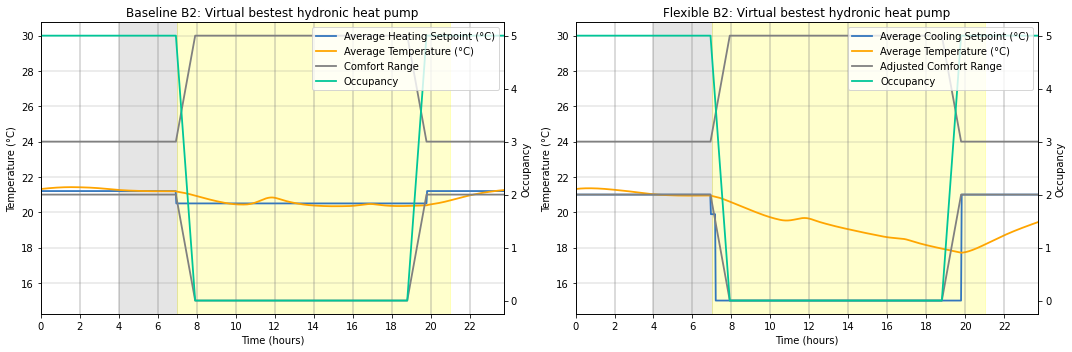

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_bas = pd.read_csv('baseline_tempData.csv', index_col='time', parse_dates=True)
df_flex = pd.read_csv('flexible_tempData.csv', index_col='time', parse_dates=True)
df_bas_schedule = pd.read_csv('scheduleData.csv', index_col='time', parse_dates=True)
df_flex_schedule = pd.read_csv('flexible_scheduleData.csv', index_col='time', parse_dates=True) #adjusted comfort range

df_bas.index = pd.to_datetime(df_bas.index, unit='s')
df_flex.index = pd.to_datetime(df_flex.index, unit='s')
df_bas_schedule.index = pd.to_datetime(df_bas_schedule.index, unit='s')
df_flex_schedule.index = pd.to_datetime(df_flex_schedule.index, unit='s')

# Calculate minute averages for each day
df_bas_setpoint_minute_average = df_bas['oveTSet_u'].resample('T').mean()
df_bas_temp_minute_average = df_bas['reaTZon_y'].resample('T').mean()

df_flex_setpoint_minute_average = df_flex['oveTSet_u'].resample('T').mean()
df_flex_temp_minute_average = df_flex['reaTZon_y'].resample('T').mean()

# Calculate hour averages for each day
schedule_hour_average = df_bas_schedule['Occupancy[1]'].resample('H').mean()

bas_low_hour_average = df_bas_schedule['LowerSetp[1]'].resample('H').mean()
bas_high_hour_average = df_bas_schedule['UpperSetp[1]'].resample('H').mean()

flex_low_hour_average = df_flex_schedule['LowerSetp[1]'].resample('H').mean()
flex_high_hour_average = df_flex_schedule['UpperSetp[1]'].resample('H').mean()

# Group the minute averages by the minute of the day and calculate the mean
bas_setpoint_minute_mean_across_days = df_bas_setpoint_minute_average.groupby(pd.Grouper(freq='T')).mean()
bas_temp_minute_mean_across_days = df_bas_temp_minute_average.groupby(pd.Grouper(freq='T')).mean()

flex_setpoint_minute_mean_across_days = df_flex_setpoint_minute_average.groupby(pd.Grouper(freq='T')).mean()
flex_temp_minute_mean_across_days = df_flex_temp_minute_average.groupby(pd.Grouper(freq='T')).mean()

# Calculate the mean values for each minute across the 14 days
bas_setpoint_average_day = bas_setpoint_minute_mean_across_days.groupby(bas_setpoint_minute_mean_across_days.index.time).mean()
bas_temp_average_day = bas_temp_minute_mean_across_days.groupby(bas_temp_minute_mean_across_days.index.time).mean()

flex_setpoint_average_day = flex_setpoint_minute_mean_across_days.groupby(flex_setpoint_minute_mean_across_days.index.time).mean()
flex_temp_average_day = flex_temp_minute_mean_across_days.groupby(flex_temp_minute_mean_across_days.index.time).mean()

# Create the figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Plot on the first subplot (ax1) baseline
baseline_setpoint_line, = ax1.plot(np.linspace(0, 23.75, len(bas_setpoint_average_day)), bas_setpoint_average_day - 273.15,
                                   linestyle='-', linewidth=1.8, label='Average Heating Setpoint (°C)', color='#3376BD')

baseline_temperature_line, = ax1.plot(np.linspace(0, 23.75, len(bas_temp_average_day)), bas_temp_average_day - 273.15,
                                      linestyle='-', linewidth=1.8, label='Average Temperature (°C)', color='orange')

baseline_low_comfort_line, = ax1.plot(np.linspace(0, 23.75, len(bas_low_hour_average)), bas_low_hour_average - 273.15,
                                      linestyle='-', linewidth=1.8, label='Comfort Range', color='gray')

baseline_high_comfort_line, = ax1.plot(np.linspace(0, 23.75, len(bas_high_hour_average)), bas_high_hour_average - 273.15,
                                      linestyle='-', linewidth=1.8, color='gray')

ax1.set_ylabel('Temperature (°C)')
ax1.set_xlabel('Time (hours)')

ax_occ = ax1.twinx()
occupancy_line, = ax_occ.plot(np.linspace(0, 23.75, len(schedule_hour_average)), schedule_hour_average, '#00c698',
                              linestyle='-', linewidth=1.8, label='Occupancy')
ax_occ.set_ylabel('Occupancy')

# Combine the legends
lines = [baseline_setpoint_line,  baseline_temperature_line, baseline_low_comfort_line, baseline_high_comfort_line, occupancy_line]
labels = [line.get_label() for line in lines]

# Set the zorder of the ax_occ object to place it behind the legend
ax_occ.set_zorder(1)

ax_occ.legend(lines, labels, loc='upper right')

plt.title('Baseline B2: Virtual bestest hydronic heat pump')

# Plot on the second subplot (ax2) flexible

flexible_setpoint_line, = ax2.plot(np.linspace(0, 23.75, len(flex_setpoint_average_day)), flex_setpoint_average_day - 273.15,
                                   linestyle='-', linewidth=1.8, label='Average Cooling Setpoint (°C)', color='#3376BD')

flexible_temperature_line, = ax2.plot(np.linspace(0, 23.75, len(flex_temp_average_day)), flex_temp_average_day - 273.15,
                                      linestyle='-', linewidth=1.8, label='Average Temperature (°C)', color='orange')

flexible_low_comfort_line, = ax2.plot(np.linspace(0, 23.75, len(flex_low_hour_average)), flex_low_hour_average - 273.15,
                                      linestyle='-', linewidth=1.8, label='Adjusted Comfort Range', color='gray')

flexible_high_comfort_line, = ax2.plot(np.linspace(0, 23.75, len(flex_high_hour_average)), flex_high_hour_average - 273.15,
                                      linestyle='-', linewidth=1.8, color='gray')

ax_occ = ax2.twinx()
occupancy_line, = ax_occ.plot(np.linspace(0, 23.75, len(schedule_hour_average)), schedule_hour_average, '#00c698',
                              linestyle='-', linewidth=1.8, label='Occupancy')
ax_occ.set_ylabel('Occupancy')

# Combine the legends and rearrange the lines and labels to put the occupancy line at the back in the legend
lines = [flexible_setpoint_line, flexible_temperature_line, flexible_low_comfort_line, flexible_high_comfort_line, occupancy_line]
labels = [line.get_label() for line in lines]

# Set the zorder of the ax_occ object to place it behind the legend
ax_occ.set_zorder(1)

ax_occ.legend(lines, labels, loc='upper right')

ax2.set_ylabel('Temperature (°C)')
ax2.set_xlabel('Time (hours)')

# Adding a shaded area for shift on both subplots
ax1.axvspan(4, 7, alpha=0.2, color='gray')
ax2.axvspan(4, 7, alpha=0.2, color='gray')

# Adding a shaded area for shed on both subplots
ax1.axvspan(7, 21, alpha=0.2, color='yellow')
ax2.axvspan(7, 21, alpha=0.2, color='yellow')

# Adding vertical gridlines on both subplots
for i in range(0, 24, 2):
    ax1.axvline(i, color='gray', linewidth=0.3)
    ax2.axvline(i, color='gray', linewidth=0.3)

from matplotlib.ticker import MultipleLocator

# Manually set x-axis limits to have equally spaced grid lines
ax1.set_xlim(0, 23.75)
ax2.set_xlim(0, 23.75)

# Adjust x-axis ticks to show every 2 hours
ax1.xaxis.set_major_locator(MultipleLocator(base=2))
ax2.xaxis.set_major_locator(MultipleLocator(base=2))

ax1.grid(which='both', axis='both', color='gray', linewidth=0.3)  # Show both major and minor gridlines
ax2.grid(which='both', axis='both', color='gray', linewidth=0.3)  # Show both major and minor gridlines

plt.title('Flexible B2: Virtual bestest hydronic heat pump')

plt.tight_layout()  # Adjust the layout to prevent overlapping labels


plt.savefig('B2_temperature.png')
plt.show()
